In [1]:
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

In [2]:
import os.path
if not os.path.exists('mlp_helper.py'):
    !wget https://github.com/lab-ml-itba/MLP-2019/raw/master/mlp_helper.py

In [3]:
from mlp_helper import plot_boundaries_keras, get_dataset, plot_boundaries, draw_neural_net, return_weights_notation, get_dataset_2
from matplotlib import pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D 

# Pruebas a realizar:
- hidden_units en 2 y 3
- Cambiar funcion de activación de la capa oculta: Sigmoid, Relu, Linear

# Dataset

In [8]:
hidden_units = 5

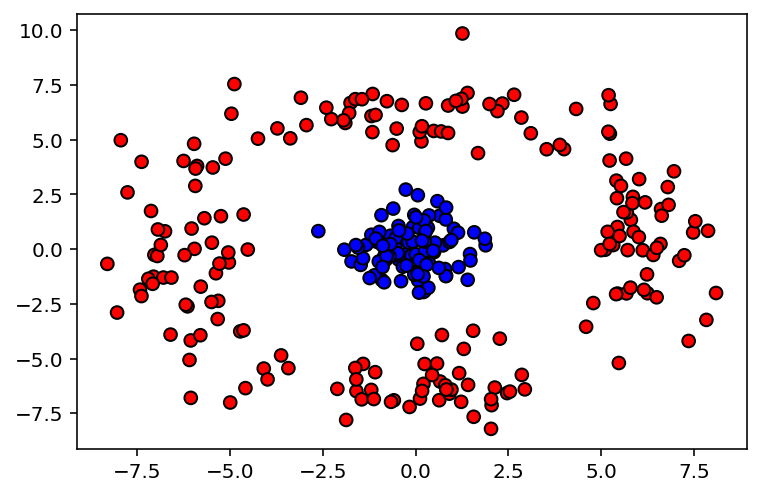

In [9]:
if hidden_units==2:
    X, y = get_dataset()
else:
    X, y = get_dataset_2()
plot_boundaries(X, y)

# Modelo: Red neuronal con 1 capa oculta

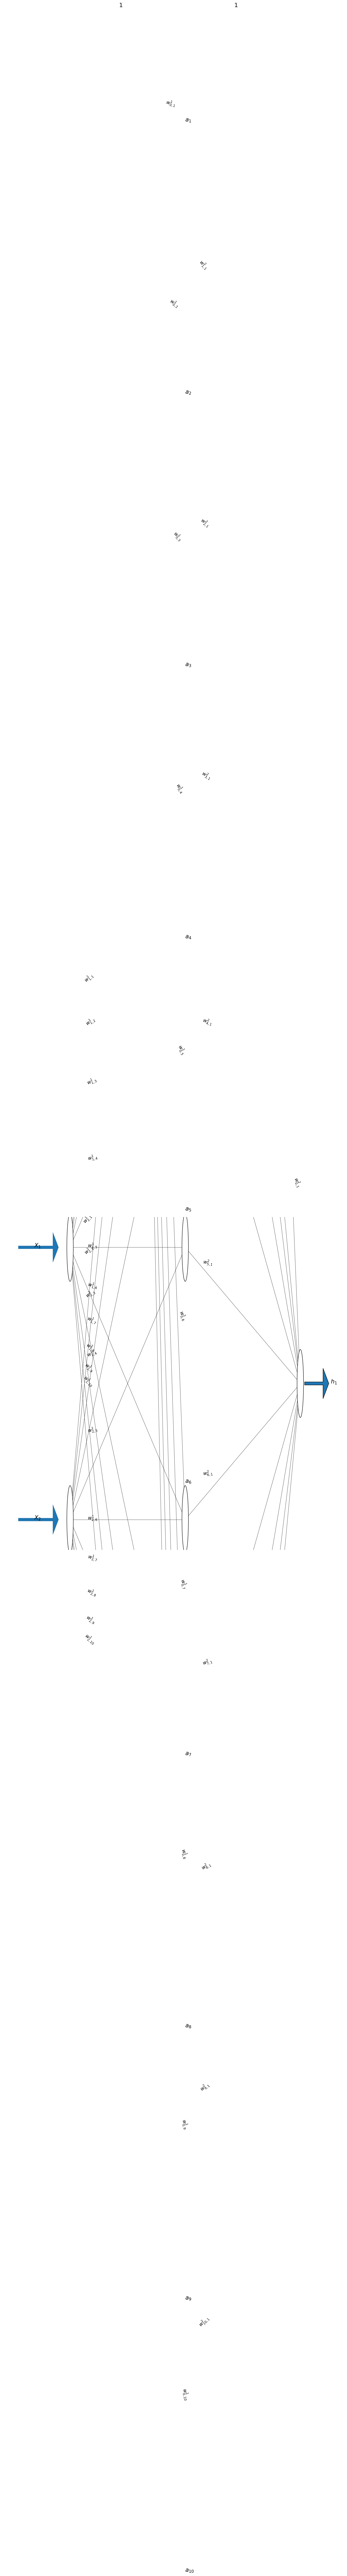

In [10]:
input_dim = 2

fig, ax = plt.subplots(1,1,figsize=(16, 16))
shape = [input_dim,10,1]
weights, biases = return_weights_notation(shape)
draw_neural_net(ax, 0.1, 0.9, 0, 0.9, shape, weights, biases, line_width=0.5)

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

### Selección de función de activación
https://medium.com/@himanshuxd/activation-functions-sigmoid-relu-leaky-relu-and-softmax-basics-for-neural-networks-and-deep-8d9c70eed91e

In [13]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

In [14]:
def plot_act(activ):
    t = np.linspace(-10, 10, 100)
    plt.plot(t, activ(t))
    plt.show()

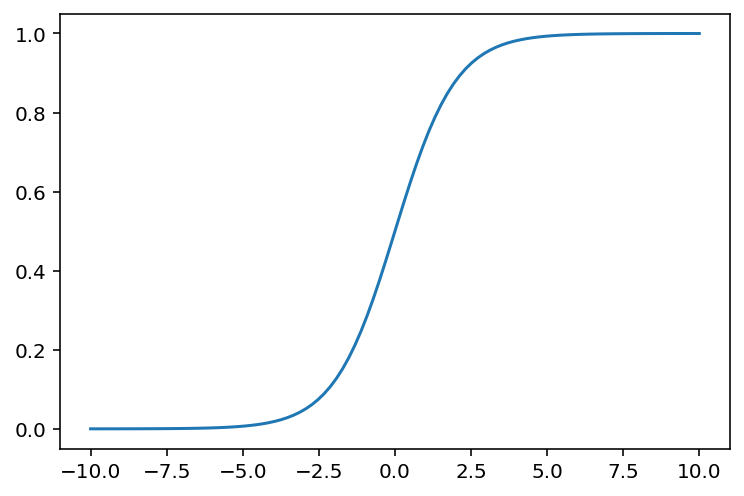

In [15]:
plot_act(sigmoid)

In [16]:
activation = 'relu' # linear, tanh, relu, tanh, sigmoid

In [17]:
model = Sequential()
model.add(Dense(hidden_units, input_shape=(input_dim,), activation=activation))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 5)                 15        
_________________________________________________________________
dense_1 (Dense)              (None, 10)                60        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 86
Trainable params: 86
Non-trainable params: 0
_________________________________________________________________


In [18]:
from tensorflow.keras.optimizers import Adam, SGD
model.compile(Adam(lr=0.01), loss='binary_crossentropy', metrics=['accuracy'])

In [19]:
model.evaluate(X, y)

300/300 [==============================] - 0s 981us/sample - loss: 1.0809 - accuracy: 0.3333


[1.0808727741241455, 0.33333334]

In [20]:
weights = model.get_weights()
print(weights)

[array([[ 0.75127745, -0.6793721 , -0.62185705, -0.58337533,  0.08683431],
       [-0.7394478 , -0.89683086, -0.05192012,  0.680287  , -0.8440817 ]],
      dtype=float32), array([0., 0., 0., 0., 0.], dtype=float32), array([[-0.33130443,  0.29456782, -0.3435313 , -0.13856664, -0.12844688,
         0.44544202, -0.41513747, -0.108356  ,  0.3075328 ,  0.52344507],
       [-0.5403484 , -0.19404152, -0.4579783 ,  0.03807622,  0.30878407,
         0.3328818 ,  0.50330216,  0.40983576,  0.0263077 , -0.26623994],
       [-0.5236695 ,  0.49429828, -0.35725585,  0.08417022, -0.23616987,
         0.58361536,  0.11730808,  0.04568172, -0.30478904, -0.48154968],
       [-0.23846021, -0.12846601, -0.34624732,  0.13374364,  0.10202408,
         0.03401774,  0.57257086, -0.07163072, -0.3099958 , -0.12133855],
       [-0.265654  , -0.08571082, -0.15220475,  0.15061694,  0.30478603,
         0.20237684, -0.39987653,  0.31634837, -0.30397117,  0.01356786]],
      dtype=float32), array([0., 0., 0., 0., 0.,

In [21]:
weights[0].shape, X[0:1].shape

((2, 5), (1, 2))

In [22]:
i = 1
sigmoid(np.dot(sigmoid(
    np.dot(X[i:i+1], weights[0]) + weights[1]), weights[2]) + weights[3])

array([[0.35255017, 0.53967441, 0.35841502, 0.52793673, 0.51130858,
        0.62054265, 0.5644437 , 0.51555956, 0.43057791, 0.47064629]])

In [23]:
model.predict(X[i:i+1])

array([[0.54604936]], dtype=float32)

## Para recordar:

- Una red neuronal es la concatenación de capas
- Cada capa hace el producto entre el vector fila de entrada con la matriz de pesos, le suma el bias y luego aplica función de activación

# Entrenamiento

In [47]:
model.fit(X, y, epochs=500, verbose=0)

(300, 2)


300/300 [==============================] - 0s 54us/sample - loss: 1.5285e-05 - accuracy: 1.0000


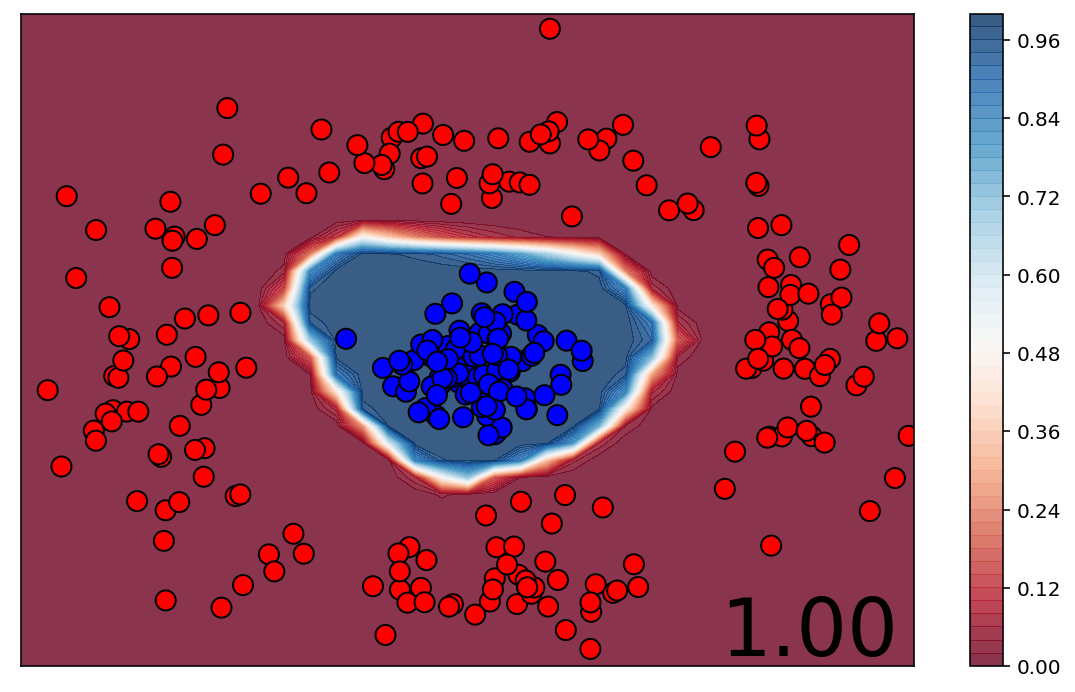

In [25]:
plt.figure(figsize=(10,6))
plot_boundaries_keras(X, y, model.evaluate(X,y)[1], probability_func=model.predict_proba, h=0.5)

In [26]:
model.predict_proba(X).shape

(300, 1)

## Obtenemos pesos de primera capa
### Pesos aprendidos

In [27]:
model.get_weights()

[array([[ 1.075408  , -1.0813967 , -0.78400385,  0.15447728, -0.02384989],
        [-0.44959766, -0.9598903 , -0.13837616,  1.2641996 , -0.987648  ]],
       dtype=float32),
 array([-1.0065473, -0.6012981, -1.365596 , -1.7531927, -1.3205566],
       dtype=float32),
 array([[ 0.3735753 , -0.2985378 ,  0.36106965,  0.5054014 , -0.73995423,
          0.7751298 , -0.7031883 , -0.5414623 ,  0.88280237, -0.5132975 ],
        [-1.147017  , -0.39550087, -1.0699514 ,  0.1699212 , -0.3452974 ,
          0.14192247,  0.08798058, -0.27626997,  0.38689834, -0.25665537],
        [-0.549788  ,  0.01051407, -0.7110095 ,  0.8866263 , -0.9748021 ,
          1.031573  , -1.4901443 , -0.6616518 ,  1.0380973 , -0.88708085],
        [ 0.462928  , -0.45656478, -0.7173174 ,  0.56343365, -0.73618925,
          0.5518951 ,  0.43568188, -0.5294009 ,  0.75067496, -0.58937484],
        [-0.58519757, -0.2438676 , -0.46445704,  0.4002971 , -0.5617204 ,
          0.2714468 , -0.70703614, -0.27581808,  0.3322673 , -0.

In [28]:
# Nos quedamos con los pesos de la primer capa
layer_1_w = model.get_weights()[0]
layer_1_b = model.get_weights()[1]
print(layer_1_w)
print(layer_1_b)

[[ 1.075408   -1.0813967  -0.78400385  0.15447728 -0.02384989]
 [-0.44959766 -0.9598903  -0.13837616  1.2641996  -0.987648  ]]
[-1.0065473 -0.6012981 -1.365596  -1.7531927 -1.3205566]


In [29]:
# Preparo los pesos a asignar a un "submodelo" de "regresión logistica"
model_1_weights = [np.array([layer_1_w[:,0]]).T, np.array([layer_1_b[0]])]
print(model_1_weights)

[array([[ 1.075408  ],
       [-0.44959766]], dtype=float32), array([-1.0065473], dtype=float32)]


In [30]:
# Construimos el submodelo
model_1 = Sequential()
model_1.add(Dense(1, input_shape=(2,), activation=activation))
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [31]:
# Le asginamos los pesos al submodelo
model_1.set_weights(model_1_weights)
model_1.compile(Adam(lr=0.1), loss='binary_crossentropy', metrics=['accuracy'])

300/300 [==============================] - 0s 524us/sample - loss: 8.9845 - accuracy: 0.3733


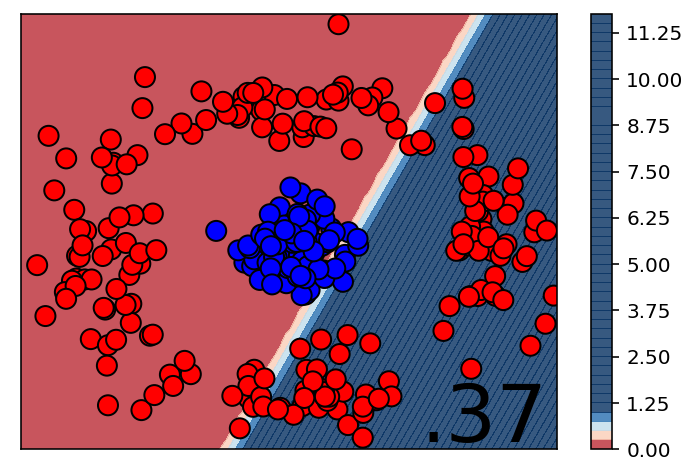

In [32]:
plot_boundaries_keras(X, y, model_1.evaluate(X,y)[1], probability_func=model_1.predict_proba, h=0.5)

### Generalizo función para armar submodelo
Y grafico los dos submodelos

In [33]:
def get_sub_model(model, index, idx1=0, idx2=1, activation='sigmoid', input_dim=2):
    layer_1_w = model.get_weights()[idx1]
    layer_1_b = model.get_weights()[idx2]
    sub_model_weights = [np.array([layer_1_w[:,index]]).T, np.array([layer_1_b[index]])]
    sub_model = Sequential()
    sub_model.add(Dense(1, input_shape=(input_dim,), activation=activation))
    sub_model.set_weights(sub_model_weights)
    sub_model.compile(Adam(lr=0.1), loss='binary_crossentropy', metrics=['accuracy'])
    return sub_model

### Graficamos las rectas aprendidas por los submodelos

300/300 [==============================] - 0s 1ms/sample - loss: 8.1093 - accuracy: 0.4267


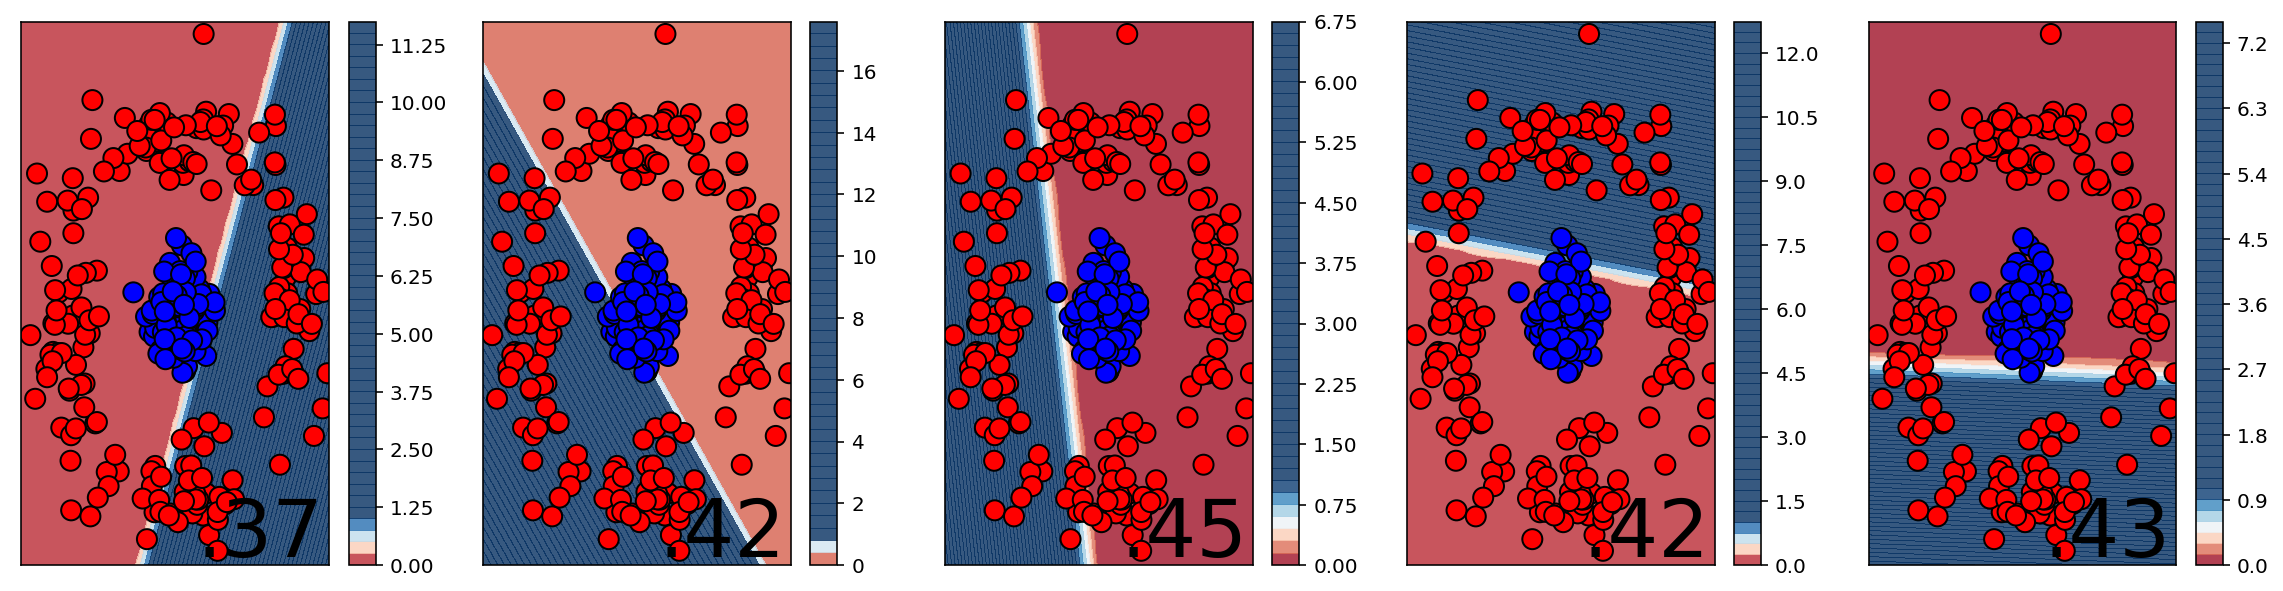

In [34]:
f, ax = plt.subplots(1, hidden_units, figsize=(20,5))
sub_models = []

# Para el mesh-grid
N = 300
X1 = np.linspace(X[:, 0].min(), X[:, 0].max(), N)
X2 = np.linspace(X[:, 1].min(), X[:, 1].max(), N)

X1, X2 = np.meshgrid(X1, X2)
Z_lr_array = []

for i in range(hidden_units):
    sub_model = get_sub_model(model, i, activation=activation)
    sub_models.append(sub_model)
    Z_lr = sub_model.predict_proba(np.c_[X1.ravel(), X2.ravel()])[:, 0]
    Z_lr = Z_lr.reshape(X1.shape)
    Z_lr_array.append(Z_lr)
    plot_boundaries_keras(X, y, sub_model.evaluate(X,y)[1], probability_func=sub_model.predict_proba, ax=ax[i], h=0.5)

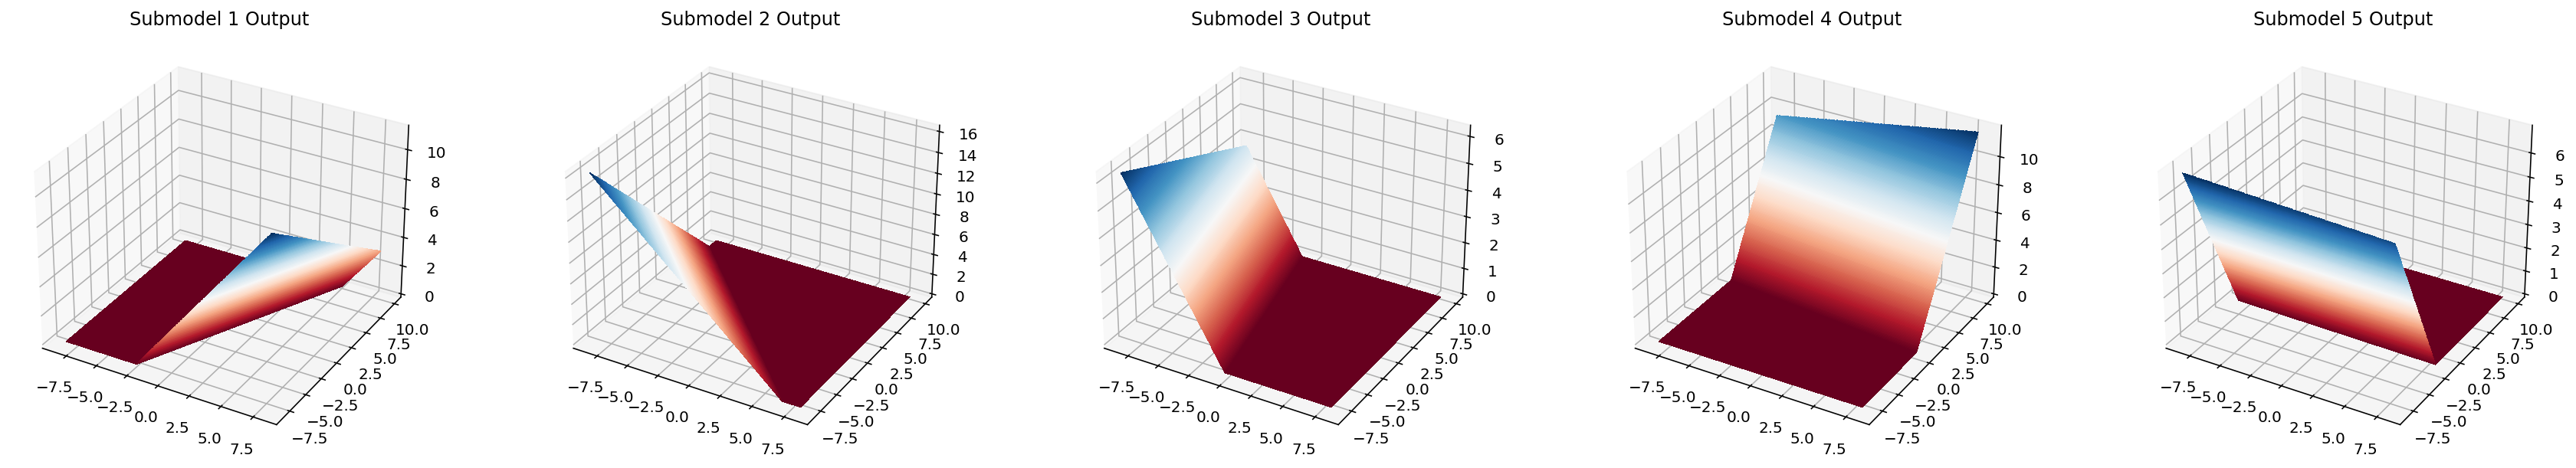

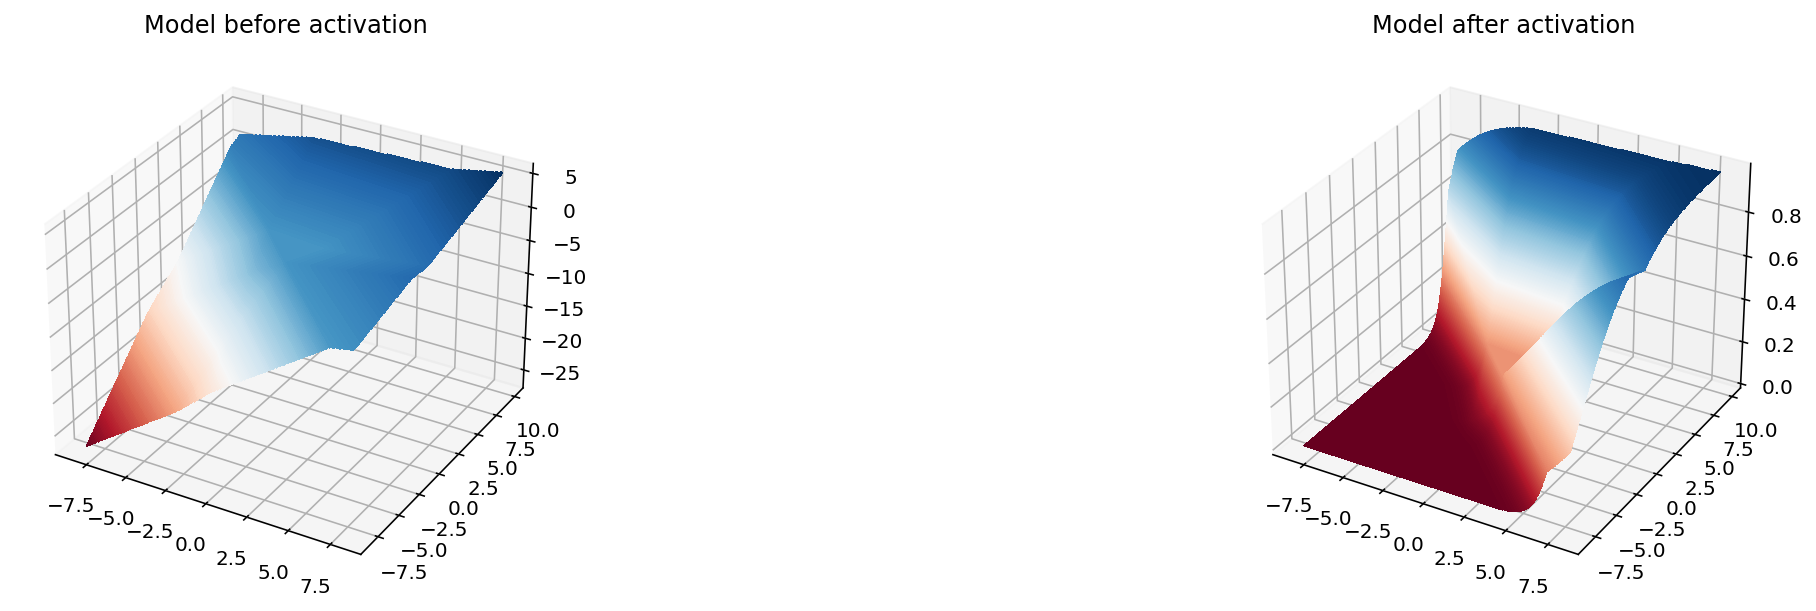

In [35]:
# set up a figure twice as wide as it is tall
fig = plt.figure(figsize=(30,5))
Z_lr_sum = 0
for i in range(hidden_units):
    ax = fig.add_subplot(1, hidden_units, i+1, projection='3d')
    ax.contourf(X1, X2, Z_lr_array[i], 256, cmap=plt.cm.RdBu) #, cmap=cm_blues)
    ax.set_title(f'Submodel {i+1} Output')
    Z_lr_sum = Z_lr_sum + Z_lr_array[i]  * model.get_weights()[2][i][0] 
plt.show()
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.contourf(X1, X2, Z_lr_sum + model.get_weights()[3][0], 256, cmap=plt.cm.RdBu) #, cmap=cm_blues)
ax.set_title(f'Model before activation')
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.contourf(X1, X2, sigmoid(Z_lr_sum + model.get_weights()[3][0]), 256, cmap=plt.cm.RdBu)
ax.set_title(f'Model after activation')
plt.show()

In [36]:
# Notar que en los gráficos se ve que parece estar al reves.
model.get_weights()[2]

array([[ 0.3735753 , -0.2985378 ,  0.36106965,  0.5054014 , -0.73995423,
         0.7751298 , -0.7031883 , -0.5414623 ,  0.88280237, -0.5132975 ],
       [-1.147017  , -0.39550087, -1.0699514 ,  0.1699212 , -0.3452974 ,
         0.14192247,  0.08798058, -0.27626997,  0.38689834, -0.25665537],
       [-0.549788  ,  0.01051407, -0.7110095 ,  0.8866263 , -0.9748021 ,
         1.031573  , -1.4901443 , -0.6616518 ,  1.0380973 , -0.88708085],
       [ 0.462928  , -0.45656478, -0.7173174 ,  0.56343365, -0.73618925,
         0.5518951 ,  0.43568188, -0.5294009 ,  0.75067496, -0.58937484],
       [-0.58519757, -0.2438676 , -0.46445704,  0.4002971 , -0.5617204 ,
         0.2714468 , -0.70703614, -0.27581808,  0.3322673 , -0.3411486 ]],
      dtype=float32)

In [37]:
model.get_weights()[3]

array([-0.9784437,  1.0057344, -0.7046357, -1.3597641,  1.9778038,
       -1.3599211,  1.2883949,  1.3088363, -2.0109642,  1.4492745],
      dtype=float32)

In [38]:
# Por eso los pesos del siguiente submodelo (el que combina los dos) son negativos

# Espacio linealmente separable

In [39]:
X_sub_preds = []
for i in range(hidden_units):
    X_sub_preds.append(sub_models[i].predict(X))

In [40]:
# Calculamos la ubicación de las observaciones en el nuevo espacio
new_space = np.hstack(X_sub_preds)

In [41]:
new_space.shape

(300, 5)

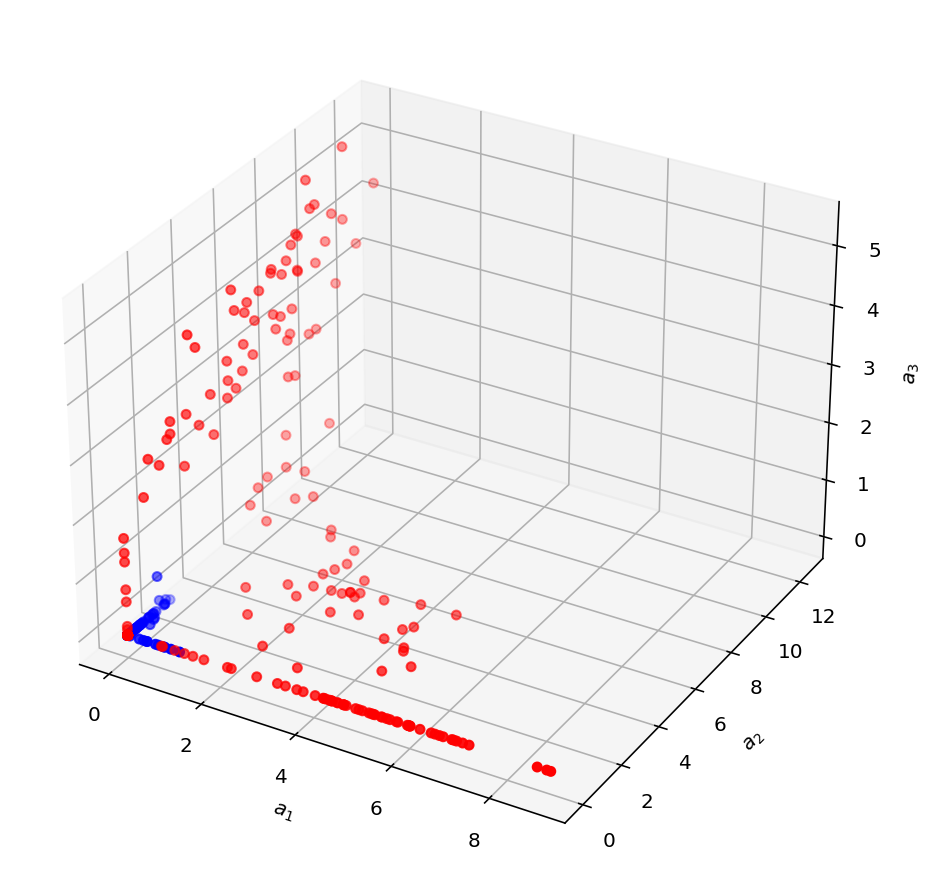

In [42]:
# Graficamos los puntos en el nuevo espacio

if hidden_units == 2:
    plt.scatter(new_space[y==1,0], new_space[y==1,1])
    plt.scatter(new_space[y==0,0], new_space[y==0,1])
    plt.show()
else:
    fig = plt.figure(figsize=(8,6))
    ax = Axes3D(fig)
    ax.scatter(new_space[y==0,0], new_space[y==0,1], new_space[y==0,2], c='r')
    ax.scatter(new_space[y==1,0], new_space[y==1,1], new_space[y==1,2], c='b')
    ax.set_xlabel('$a_1$')
    ax.set_ylabel('$a_2$')
    ax.set_zlabel('$a_3$')

In [43]:
# Creo el submodelo de la salida. Lleva sigmoidea por que es ya la predicción
sub_model_3 = get_sub_model(model, 0, 2, 3, activation='sigmoid', input_dim=hidden_units)

In [44]:
sub_model_3.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 1)                 6         
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


In [45]:
weights_3 = sub_model_3.get_weights()
weights_3

[array([[ 0.3735753 ],
        [-1.147017  ],
        [-0.549788  ],
        [ 0.462928  ],
        [-0.58519757]], dtype=float32),
 array([-0.9784437], dtype=float32)]

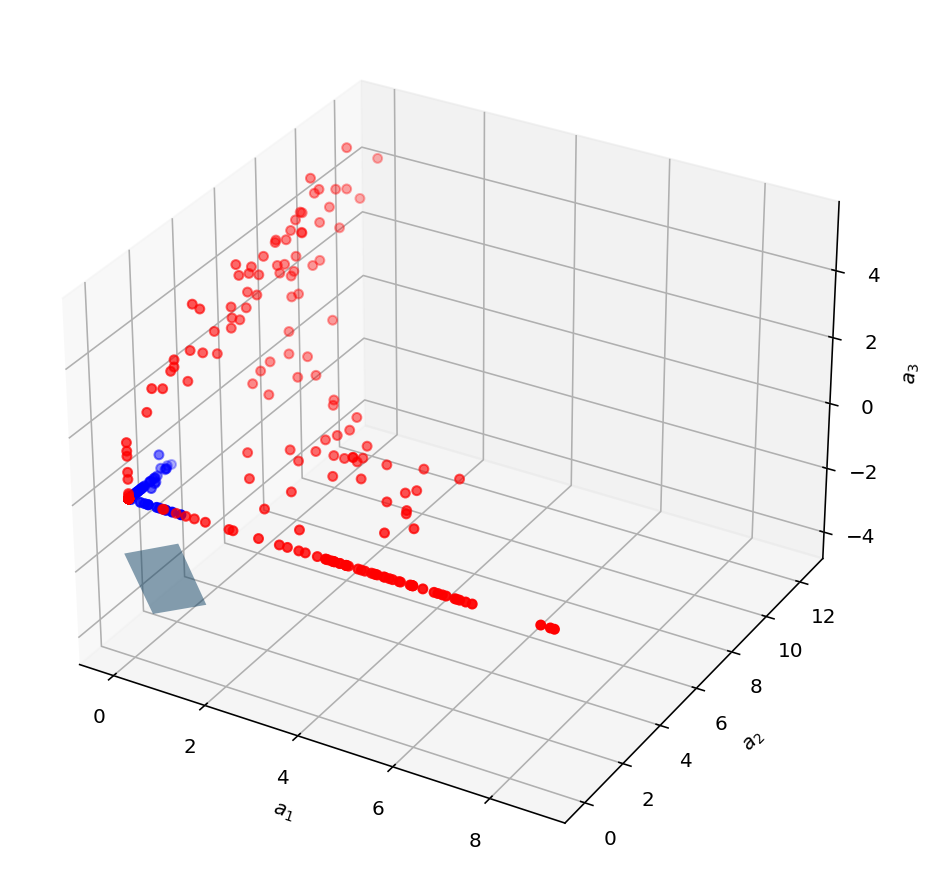

In [46]:
if hidden_units == 2:
    plot_boundaries_keras(new_space, y, sub_model_3.evaluate(new_space,y)[1], probability_func=sub_model_3.predict_proba, h=0.2)
else:
    # %matplotlib widget
    N=2
    xi, yi = np.meshgrid(np.linspace(-0.1, 1.1, N), np.linspace(-0.1, 1.1, N))
    z = (- xi*weights_3[0][0, 0 ] - yi*weights_3[0][1, 0] - weights_3[1][0])/weights_3[0][2,0]
    z = z 
    fig = plt.figure(figsize=(8,6))
    ax = Axes3D(fig)
    ax.plot_surface(xi, yi, z, alpha= 0.5)
    ax.scatter(new_space[y==0,0], new_space[y==0,1], new_space[y==0,2], c='r')
    ax.scatter(new_space[y==1,0], new_space[y==1,1], new_space[y==1,2], c='b')
    # ax.view_init(elev=20., azim=60)
    ax.set_xlabel('$a_1$')
    ax.set_ylabel('$a_2$')
    ax.set_zlabel('$a_3$')
    plt.show()